### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [223]:
# write your answer here

In [224]:
import pandas as pd

import requests
from bs4 import BeautifulSoup

# Benguerir city

In [225]:
## Benguerir city
url = 'https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111'

html = requests.get(url)

In [226]:
html
#Response 200 means that the request has succeeded

<Response [200]>

In [227]:
soup = BeautifulSoup(html.text, 'html.parser')
#print(soup.prettify())

In [228]:
#we start 
all_content = soup.find_all('div', {'class':"DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF"})
#liste of days 
days = []
#liste of the temperature max for each day	
temperature_max=[]
#liste of the temperature min for each day
temperature_min=[]
#liste of the weather state for each day
day_state=[]
#liste of the wind_speed for each day
wind_speed=[]
#liste of the raining percentage for each day
rain_perc=[]

for i in all_content:
    day = i.find('h3').text
    w_max = i.find('span',{'class':'DetailsSummary--highTempValue--3PjlX'}).text
    w_min = i.find('span',{'class':'DetailsSummary--lowTempValue--2tesQ'}).text
    d_state= i.find('span',{'class':'DetailsSummary--extendedData--307Ax'}).text
    w_speed= i.find('span',{'class':'Wind--windWrapper--3Ly7c undefined'}).text
    days.append(day)
    temperature_max.append(w_max)
    temperature_min.append(w_min)
    day_state.append(d_state)
    wind_speed.append(w_speed)
    
#get the rain data
for i in range(1,16) :    
    d_rain=soup.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()
    rain_perc.append(d_rain)

### DataFrame for Ben Guerir City

In [229]:
#Storing the data sets into Pandas DataFrame.
data={'days':days,'temperature_max':temperature_max,'temperature_min':temperature_min,'day_state':day_state,
      'wind_speed':wind_speed,'rain_perc':rain_perc}
df = pd.DataFrame(data)
#df = pd.concat([pd.DataFrame(data=days)], axis=1)
df

,days,temperature_max,temperature_min,day_state,wind_speed,rain_perc
0,Ce soir,--,11°,Nuageux,SSO 5 km/h,14%
1,sam. 17,19°,8°,Peu nuageux,E 13 km/h,15%
2,dim. 18,22°,8°,Peu nuageux,ESE 11 km/h,15%
3,lun. 19,23°,7°,Plutôt ensoleillé,E 12 km/h,8%
4,mar. 20,23°,7°,Peu nuageux,SSO 13 km/h,8%
5,mer. 21,22°,7°,Plutôt ensoleillé,ENE 13 km/h,7%
6,jeu. 22,21°,6°,Ensoleillé,ENE 12 km/h,7%
7,ven. 23,22°,6°,Ensoleillé,SSO 14 km/h,7%
8,sam. 24,21°,7°,Plutôt ensoleillé,SSO 13 km/h,7%
9,dim. 25,21°,8°,Plutôt ensoleillé,S 14 km/h,10%


In [230]:
#get our data frame to a csv file 
df.to_csv('weather_Benguerir.csv', index=False)


# Tanger City.

In [231]:
#we do exactly the same thing
## tanger city
url = 'https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c'

html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')

In [232]:
#we start 
all_content = soup.find_all('div', {'class':"DetailsSummary--DetailsSummary--1DqhO DetailsSummary--fadeOnOpen--KnNyF"})
#liste of days 
days = []
#liste of the temperature max for each day	
temperature_max=[]
#liste of the temperature min for each day
temperature_min=[]
#liste of the weather state for each day
day_state=[]
#liste of the wind_speed for each day
wind_speed=[]
#liste of the raining percentage for each day
rain_perc=[]

for i in all_content:
    day = i.find('h3').text
    w_max = i.find('span',{'class':'DetailsSummary--highTempValue--3PjlX'}).text
    w_min = i.find('span',{'class':'DetailsSummary--lowTempValue--2tesQ'}).text
    d_state= i.find('span',{'class':'DetailsSummary--extendedData--307Ax'}).text
    w_speed= i.find('span',{'class':'Wind--windWrapper--3Ly7c undefined'}).text
    days.append(day)
    temperature_max.append(w_max)
    temperature_min.append(w_min)
    day_state.append(d_state)
    wind_speed.append(w_speed)
    
#get the rain data
for i in range(1,16) :    
    d_rain=soup.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()
    rain_perc.append(d_rain)


### DataFrame for Tanger City

In [233]:
#Storing the data sets into Pandas DataFrame.
data={'days':days,'temperature_max':temperature_max,'temperature_min':temperature_min,'day_state':day_state,
      'wind_speed':wind_speed,'rain_perc':rain_perc}
df = pd.DataFrame(data)
#df = pd.concat([pd.DataFrame(data=days)], axis=1)
df

,days,temperature_max,temperature_min,day_state,wind_speed,rain_perc
0,Aujourd’hui,19°,12°,Averses,SO 10 km/h,14%
1,dim. 18,20°,15°,Peu nuageux,E 24 km/h,14%
2,lun. 19,21°,14°,Peu nuageux,E 18 km/h,12%
3,mar. 20,21°,16°,Averses dans l'après-midi,SE 13 km/h,12%
4,mer. 21,19°,13°,Averses dans la matinée,SO 9 km/h,12%
5,jeu. 22,19°,12°,Plutôt ensoleillé,NE 8 km/h,45%
6,ven. 23,19°,13°,Ensoleillé,S 7 km/h,77%
7,sam. 24,19°,13°,Averses dans l'après-midi,S 9 km/h,49%
8,dim. 25,20°,14°,Peu nuageux,SE 14 km/h,15%
9,lun. 26,18°,14°,Averses,SE 20 km/h,12%


In [235]:
#get our data frame to a csv file 
df.to_csv('weather_tanger.csv', index=False)


# Plot the raining days of the two cities

In [236]:
import matplotlib.pyplot as plt

In [237]:
Benguerir_WTHR = pd.read_csv('weather_Benguerir.csv',encoding= 'unicode_escape')
Tanger_WTHR = pd.read_csv('weather_tanger.csv', encoding= 'unicode_escape')

C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


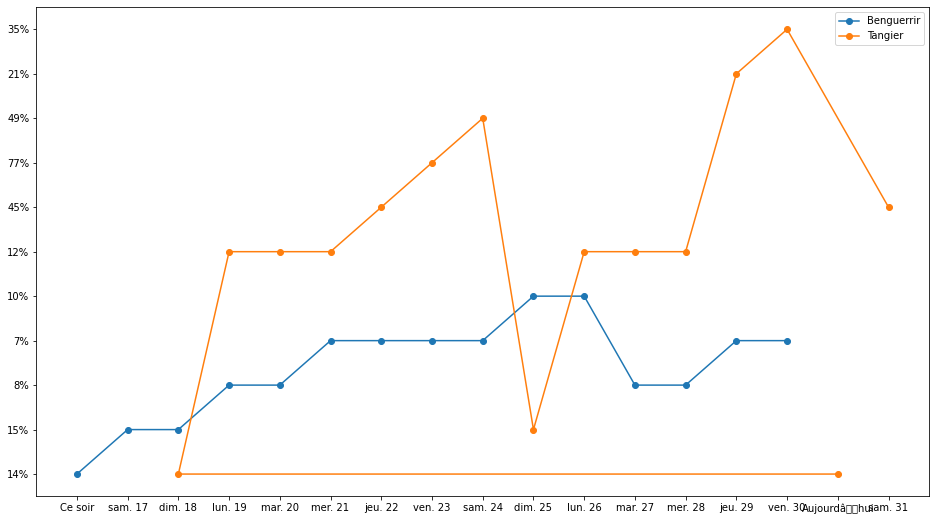

In [238]:
#ploting the avg rain in both cities
plt.figure(figsize=(16,9))
plt.plot(Benguerir_WTHR["days"],Benguerir_WTHR["rain_perc"],marker = 'o',label="Benguerrir")
plt.plot(Tanger_WTHR["days"],Tanger_WTHR["rain_perc"],marker = 'o',label="Tangier")
plt.legend()
plt.show()